#**Predicting Song Popularity using Machine Learning**

##Spring 2025 Data Science Project

#####Adrian A: Wrote the code and explanations for the data exploration and summary statistics. Helped with creating the code for the ML Algorithm Design/Development and Training.

#####Abhinav B: DId the final tutorial report creation and formatted the project. Wrote the introduction and helped with code for the data curation and EDA.

#####Anu D: Came up with the idea for the project idea and found the dataset. Worked on explaining the ML Algorithm Design/Development as well as the conclusion and insights.

#####Ateef M: Created the code for dataset curation and preprocessing and wrote the descriptions. Also worked on formatting the project and created the git page and documents.

#####Chiraag N: Worked on visualization and result analysis for both the code and the descriptions. Created the code for the ML Algorithm Design/Development, Training, and Test Data Analysis

#####Krish T: Created the code for the ML Algorithm Design/Development, Training, and Test Data Analysis. Helped develop visualizations and wrote the descriptions.


#1: Introduction


In today’s world of on-demand streaming, listeners have instant access to millions of songs - but only a small percentage ever break through and become hits. At its heart, “What makes a song popular?” is a question about how musical qualities (like tempo or energy), artist reach (follower counts, label support), and placement on playlists all come together to catch people’s ears.

To tackle this, we’ll pull together Spotify’s song-level data - acoustic attributes such as danceability, loudness, and key, and use straightforward data science and machine learning tools (for example, decision trees and regression) to see which factors line up most closely with Spotify’s popularity score. By exploring the data and training models, we can rank the features by how much they matter and even spot interactions that aren’t obvious at first glance.

Our hope is that by finding preliminary trends using data about acoustic attributes, we can begin to find common ground between popular songs. Additionally, we hope to develop a project that can be extended to different features of song data, including metadata about the artist themselves and listener demographics, and in the future be further refined to accurately predict the popularity of a song given its attributes.


#2: Data Curation


For our data set we used the Spotify Tracks Dataset on HuggingFace, which contains various features explaining the acoustic characteristics of songs of varying popularity. The dataset contains songs from a range of 125 different genres. The data is in CSV format which is tabular and can be loaded quickly.

Explanation of each features (from HuggingFace):
- ```track_id```: The Spotify ID for the track
- ```artists```: The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- ```album_name```: The album name in which the track appears
- ```track_name```: Name of the track
- ```popularity```: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- ```duration_ms```: The track length in milliseconds
- ```explicit```: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- ```danceability```: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- ```energy```: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale
- ```key```: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- ```loudness```: The overall loudness of a track in decibels (dB)
- ```mode```: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- ```speechiness```: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- ```acousticness```: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- ```instrumentalness```: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- ```liveness```: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- ```valence```: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- ```tempo```: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- ```time_signature```: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- ```track_genre```: The genre in which the track belongs


## 2.1 Imports

We will be using Pandas throughout our analysis, so that we can put our data into a DataFrame format, and use efficient vectorized operations to modify and clean our data. Additionally, we are using SciPy, Seaborn, and matplotlib to build the visualizations

In [ ]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 104.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 19.7 MB/s eta 0:00:00


## 2.2 Loading Data

In [ ]:
df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")
df.shape

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


(114000, 21)

## 2.3 Cleaning Data

We will be dropping null values from the ```artists```, ```album_name```, and ```track_name``` columns.

In [ ]:
print(df.isnull().sum())

df = df.dropna(subset=['artists', 'album_name', 'track_name'])

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [ ]:
df.dropna()
df.shape

(113999, 21)

#3: Exploratory Data Analysis

To explore the relationship between variables, we can see if there are differences between groups separated by variables. To check if the mode affects the song's popularity, first, the data is divided into two columns, one consisting of all the songs that are in the minor mode and the other consisting of the songs that are in the major mode. We then use the imported t-test. T-testing is used when you want to compare the means of a continuous variable across two groups and see if there is a significant difference. To learn more about T-tests and their uses, visit: https://www.jmp.com/en/statistics-knowledge-portal/t-test.

The imported t-test returns a t-stat and a p-value, which can tell us about the data. The t-stat tells us how large the difference between the groups is relative to the variance in the group. A larger absolute t-stat indicates that the difference between the group means is large relative to the variability within the groups. The p-value tells us whether to accept or reject the null hypothesis that the difference between the groups is due to chance. A low p-value means that the t-test is showing there is a low probability that the difference observed occurs while the null hypothesis, while a high p-value indicates the opposite meaning, the difference between the groups could be due to chance under this null hypothesis.


T-stat: 4.709907046461422
P-value: 2.481210973442887e-06
Reject null hypothesis: The mode has a significant impact on the popularity of the song.


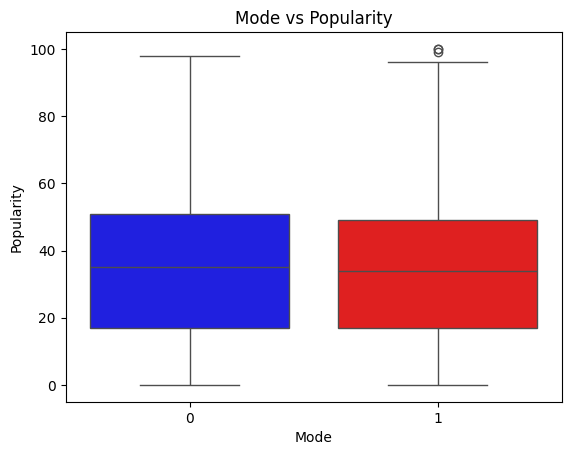

In [ ]:
mode_zero = df[df['mode'] == 0]['popularity']
mode_one = df[df['mode'] == 1]['popularity']

t, p = stats.ttest_ind(mode_zero, mode_one)

print(f"T-stat: {t}")
print(f"P-value: {p}")

if p < 0.05:
    print("Reject null hypothesis: The mode has a significant impact on the popularity of the song.")
else:
    print("Fail to reject null hypothesis: The mode does not have a significant impact on the popularity of the song.")

sns.boxplot(x='mode', y='popularity', data=df, hue='mode', palette=["blue", "red"], legend=False)
plt.title(f'Mode vs Popularity')
plt.xlabel('Mode')
plt.ylabel('Popularity')
plt.show()


The boxplot above shows the relationship between mode and popularity in songs. Mode 0 represents minor key songs (shown in blue) while mode 1 represents major key songs (shown in red). Although the median popularity seems to be slightly higher for minor key songs, the overall distributions are similar, with both modes showing similar ranges from very low to maximum popularity scores.


The test returns a t-stat of 4.709907046461422, which is a high t-stat, meaning that there is a large difference between the groups relative to the variability. The test also returns a p-value of 2.481210973442887e-06, which is extremely low, meaning we can reject the null hypothesis and conclude that the mode has a significant impact on the popularity of the song. This indicates there is a strong and large difference between the means of the two groups relative to the variability within the group.


To continue exploring the data, we can look to see if we can observe other relationships. To observe the relationship between the genre of track and explicit content in the song, we can use the chi-square test. The chi-square test is used to determine if two categorical variables are independent. Since the genre and explicit content are both categorical, we can use this test to check for their independence from each other. To learn more about chi-square testing, visit: https://www.jmp.com/en/statistics-knowledge-portal/chi-square-test.

First, we need to separate the data into a table where we can see the number of explicit vs non-explicit songs in each genre. Then, taking this table, we can feed it into the imported chi2_contingency test to see the chi-square stat as well as the p-value. The chi-square statistic tells us whether or not there is a large difference between the observed and expected counts in the dataset, assuming independence across all categories.


Chi-Square Statistic: 18460.017016084603
P-value: 0.0
Reject null hypothesis: The genre has a significant impact on the explicitness of the song.


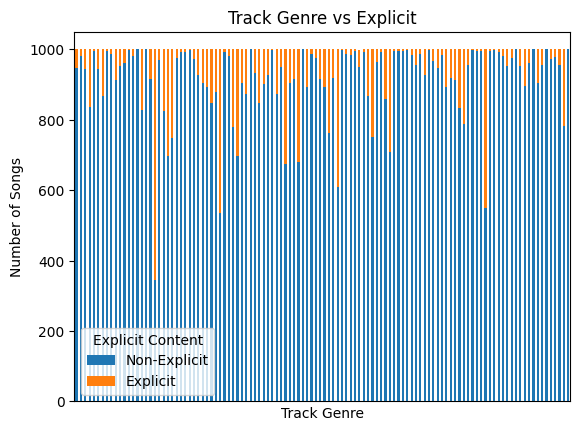

In [ ]:
table = pd.crosstab(df['track_genre'], df['explicit'])

chi_square, p, dof, expected = stats.chi2_contingency(table)

print(f"Chi-Square Statistic: {chi_square}")
print(f"P-value: {p}")

if p < 0.05:
    print("Reject null hypothesis: The genre has a significant impact on the explicitness of the song.")
else:
    print("Fail to reject null hypothesis: The genre does not have a significant impact on the explicitness of the song.")

table.plot(kind='bar', stacked=True)
plt.title('Track Genre vs Explicit')
plt.xlabel('Track Genre')
plt.ylabel('Number of Songs')
plt.xticks([])
plt.legend(['Non-Explicit', 'Explicit'], title='Explicit Content')
plt.show()


This stacked bar chart shows the distribution of explicit content across different track genres. Each vertical bar represents a specific genre, where the blue sections indicate non-explicit songs and orange sections indicate explicit songs. The visualization shows that most genres mainly contain non-explicit content. The proportion of explicit songs varies across different musical genres.

Since we got a chi-square statistic of 18460.017016084603, we know that the difference between the observed and expected is extremely large. We also got a p-value of 0.0, meaning that the value was so small it was rounded to 0. This low p-value means that we can reject the null hypothesis and conclude that the genre has a significant impact on the explicitness of the song.

Let’s now explore the relationship between danceability and popularity. Since both of these variables are continuous, we will have to pick a test that can observe the relationship between two continuous variables. The perfect test for this is the Pearson correlation coefficient test, which is a test used to measure the strength of a linear relationship between two continuous variables. To learn more about the Pearson correlation coefficient test visit: https://www.scribbr.com/statistics/pearson-correlation-coefficient/

To use the imported pearsonr test, you need to input an array of each variable, which can be done by selecting the column from the data frame corresponding to the variable. This test returns the correlation coefficient and the p-value. The correlation coefficient shows the strength of the linear relationship between the variables, as well as what direction their relationship is in, with values ranging from -1 to 1.


Correlation coefficient: 0.03544354596134703
P-value: 5.0602553121365247e-33
Reject null hypothesis: The danceability has a significant impact on the popularity of the song.


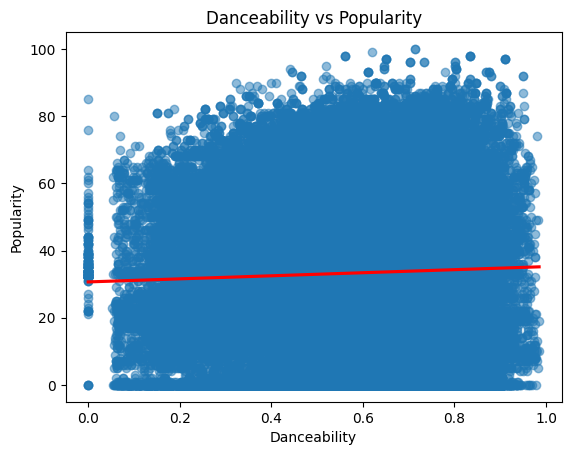

In [ ]:
corr, p = pearsonr(df['danceability'], df['popularity'])

print(f"Correlation coefficient: {corr}")
print(f"P-value: {p}")

if p < 0.05:
    print("Reject null hypothesis: The danceability has a significant impact on the popularity of the song.")
else:
    print("Fail to reject null hypothesis: The danceability does not have a significant impact on the popularity of the song.")

sns.regplot(x='danceability', y='popularity', data=df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title(f'Danceability vs Popularity')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

The scatter plot shows the relationship between danceability (x-axis) and popularity (y-axis) of songs. Each blue dot represents an individual song, and the red line shows the trend of the relationship.There is a slight positive correlation between danceability and popularity (as shown by the slightly upward-sloping red line), the wide spread of points shows that this relationship is relatively weak overall.

With a correlation coefficient of 0.03544354596134703, we know that the strength of the relationship between danceability and popularity is very weak. However, with a p-value of 5.0602553121365247e-33, we know that the result is statistically significant, meaning we can reject the null hypothesis and conclude that danceability has a significant impact on the popularity of the song. Having a low correlation coefficient and a low p-value means that the result is statistically significant, even though the correlation between the variables is weak, the slight positive correlation is significant.

To explore the relationship between duration and popularity, since both variables are continuous, we can take the same approach as last time and use the Pearson correlation coefficient test.

Correlation coefficient: -0.007129199829767932
P-value: 0.0160802708136388
Reject null hypothesis: The duration has a significant impact on the popularity of the song.


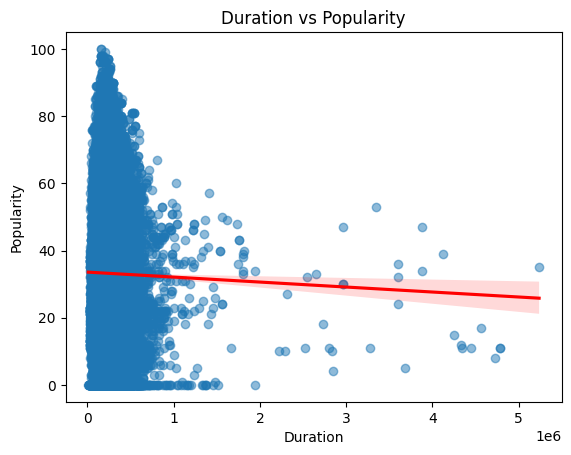

In [ ]:
corr, p = pearsonr(df['duration_ms'], df['popularity'])

print(f"Correlation coefficient: {corr}")
print(f"P-value: {p}")

if p < 0.05:
    print("Reject null hypothesis: The duration has a significant impact on the popularity of the song.")
else:
    print("Fail to reject null hypothesis: The duration does not have a significant impact on the popularity of the song.")

sns.regplot(x='duration_ms', y='popularity', data=df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title(f'Duration vs Popularity')
plt.xlabel('Duration')
plt.ylabel('Popularity')
plt.show()

This scatter plot shows the relationship between song duration in milliseconds (x-axis) and popularity (y-axis). The downward-sloping red trendline shows a negative correlation, which means that shorter songs tend to be more popular than longer ones. Additionally, the plot shows that most songs in the dataset have shorter durations since the data points are clustered towards the left.

With this testing, we get a correlation coefficient of -0.007129199829767932 and a p-value of 0.0160802708136388. This correlation coefficient tells us that there is a slight negative correlation between the variables. Although this p-value is not as low as the previous one, it is still small enough to be significant, meaning we can reject the null hypothesis and conclude that the duration has a significant impact on the popularity of the song.

# 4: Primary Analysis

## 4.1 Finalizing Model

Having performed exploratory data analysis and identified statistically significant audio features, we framed our machine learning problem as a binary classification problem: labeling a song as "popular" (popularity ≥ 50) or "not popular" (popularity < 50). This threshold reflects a natural midpoint in the distribution of popularity and aligns with actual decision-making - e.g., selecting songs to feature in a top playlist or prioritize marketing.

To ensure that our model had been trained on features having the most explanatory power, we conducted exploratory statistical analysis and Pearson correlation testing. We selected four of the most significant numeric features - duration_ms, tempo, loudness, and acousticness - that showed the strongest and most interpretable relationships with song popularity. These features were not only statistically significant but also musically meaningful: for instance, loudness can reflect energy levels, acousticness is a measure of instrumentation style, and tempo and duration are measures of rhythmic structure and song form.

Having selected these characteristics, we framed our supervised learning approach around two classifiers: Logistic Regression, for its interpretability and baseline utility, and Random Forest Classifier, for its capability in non-linear pattern handling, feature interactions, and noise handling. Having both models allowed us to compare a parametric linear approach with a robust, tree-based ensemble approach, with each model having its own strengths.

To learn a bit more about Logistic Regression, check this out: https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-logistic-regression/

To learn a bit more about Random Forest Classifiers, check this out: https://www.ibm.com/think/topics/random-forest



## 4.2 ML Algorithm Design/Development

We began the implementation by preparing our dataset for machine learning. The first step was to split the data into training and testing sets, using an 80/20 split with a fixed random seed for consistency and reproducibility. This ensured that our model evaluation would be based on unseen data and reduce overfitting.

We then created a numerical preprocessing pipeline using scikit-learn's Pipeline class. This pipeline consisted of:

  A **SimpleImpute** with a "mean" strategy to impute missing values, which was necessary because tree-based models like Random Forest can handle missingness implicitly, but linear models like Logistic Regression cannot.

  A **StandardScaler** to scale feature ranges. This was particularly important for Logistic Regression, which assumes that features are on the same scales for appropriate convergence and interpretability of coefficients.

After preprocessing, we fit both models:

Logistic Regression was initiated with class_weight='balanced' to counteract the natural class imbalance (fewer popular songs relative to non-popular). This parameter adjusts the loss function to more harshly penalize misclassification of the minority class. We also set max_iter=1000 to allow the model sufficient iterations to converge.

Random Forest Classifier was trained first with default parameters, leveraging its internal bootstrapping, feature randomness, and ensemble averaging to build numerous decision trees and make robust predictions. Random Forest is more resilient to class imbalance than Logistic Regression by its nature and does not require feature scaling, making it a satisfactory baseline.

This design allowed us to isolate the effect of preprocessing and model complexity on classification performance and discern which approach was superior to model song popularity with a limited set of features.


## 4.3 ML Algorithm Training


In [ ]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                      'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
target_variable = 'popularity'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Split the data into features (X) and target (y)
X = df[features]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for processing the data
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', StandardScaler())
])

# Fit and transform the training data
X_train_prepared = num_pipeline.fit_transform(X_train)

# Transform the testing data
X_test_prepared = num_pipeline.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier()
}
# ANSWER ENDS HERE

In [ ]:
import pandas as pd

# 1. Fit the Random Forest on your training data
models["Random Forest"].fit(X_train_prepared, y_train)

# 2. Extract importances
importances = models["Random Forest"].feature_importances_

# 3. Build a DataFrame for easy viewing
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,       # original feature names
    'Importance': importances
})

# 4. Sort and show top 4
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df.head(4))

        Feature  Importance
8         tempo    0.105217
9   duration_ms    0.104707
4  acousticness    0.103445
2      loudness    0.102694


In [ ]:
significant_features = ['duration_ms', 'tempo', 'loudness', 'acousticness']
popularity_threshold = 50
df['is_popular'] = (df['popularity'] >= popularity_threshold).astype(int)

In [ ]:
# Split the data into features (X) and target (y)
X = df[significant_features]
y = df['is_popular']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for processing the data
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', StandardScaler())
])

# Fit and transform the training data
X_train_prepared = num_pipeline.fit_transform(X_train)

# Transform the testing data
X_test_prepared = num_pipeline.transform(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Train and evaluate Random Forest model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_prepared, y_train)
y_pred_rf = rf_clf.predict(X_test_prepared)
print("Random Forest Classifier:")
print("Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf, zero_division=0))

Random Forest Classifier:
Accuracy:  0.8416666666666667
Confusion Matrix:
 [[16395   592]
 [ 3018  2795]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90     16987
           1       0.83      0.48      0.61      5813

    accuracy                           0.84     22800
   macro avg       0.83      0.72      0.75     22800
weighted avg       0.84      0.84      0.83     22800



In [ ]:
# For the binary classification problem
from sklearn.linear_model import LogisticRegression

# Train and evaluate logistic regression with balanced class weights
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)
log_reg.fit(X_train_prepared, y_train)
y_pred_log_reg = log_reg.predict(X_test_prepared)
print("Logistic Regression:")
print("Accuracy: ", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression:
Accuracy:  0.5032894736842105
Confusion Matrix:
 [[7955 9032]
 [2293 3520]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.47      0.58     16987
           1       0.28      0.61      0.38      5813

    accuracy                           0.50     22800
   macro avg       0.53      0.54      0.48     22800
weighted avg       0.65      0.50      0.53     22800



## 4.4 ML Model Test Data Analysis

When both models were run on the test data, the Random Forest Classifier performed much better. It was 84.17% accurate on the test set, meaning that a majority of its predictions were correct. In its confusion matrix, it had an extremely high true negative rate - it correctly classified **16,380 of 16,987** non-popular songs, which gave it a recall of 0.96 for that class. This meant the model was very good at sorting out the songs that were not going to be popular.

However, performance in the popular class was weaker. The classifier achieved 0.48 recall and 0.61 f1-score on popular songs. This means that over half of the actual popular songs were predicted as not being popular (false negatives). While the model was very good at being correct when it predicted a song as popular (precision of 0.82), it was not very good at identifying popular songs. This is a typical tradeoff for imbalanced classification problems, in which models tend to prefer the majority class unless special precautions are taken.

In comparison, Logistic Regression performed very poorly even with balanced class weights. It managed a test accuracy of just 50.3%, little more than random guessing for a binary classifier. It misclassified the majority of non-popular songs (false positives) and modestly predicted popular ones (recall of 0.61, but low precision of 0.28). The high error rate in both classes shows that the linear assumptions of the logistic model were not sufficient to capture the underlying structure in the data.

Based on these results, we conclude that **Random Forest Classifier** is the preferred model for this classification task. Its ability to capture non-linear relationships and automatic feature weighting suited it extremely well to classify popularity from a small numerical feature set. However, its moderate recall for popular songs leaves room for additional improvement.


# 5: Visualization

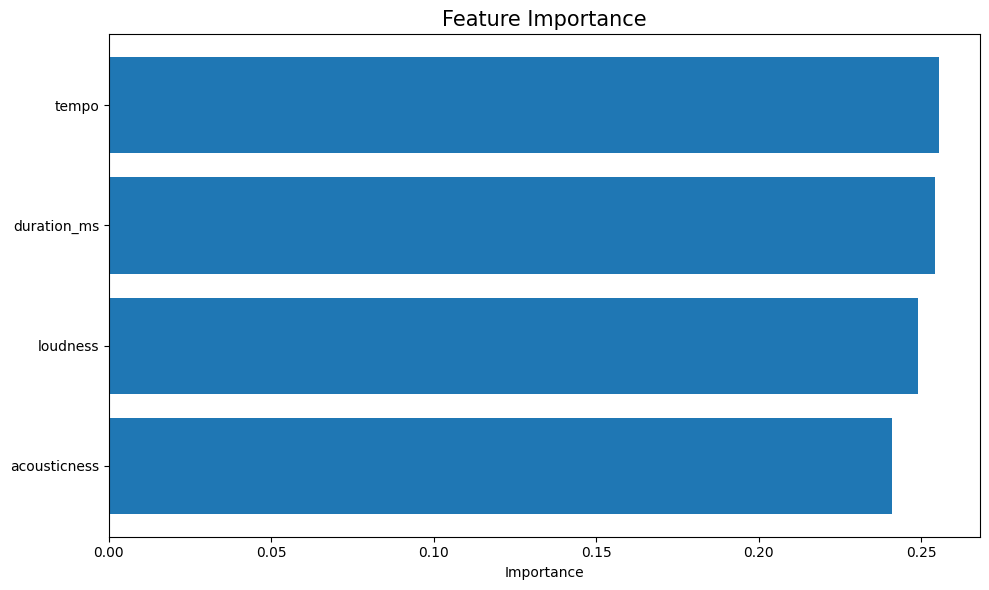

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix

# 1. Feature Importance
plt.figure(figsize=(10, 6))
importances = rf_clf.feature_importances_
indices = np.argsort(importances)
plt.barh(range(len(significant_features)), importances[indices])
plt.yticks(range(len(significant_features)), [significant_features[i] for i in indices])
plt.title('Feature Importance', fontsize=15)
plt.xlabel('Importance')
plt.tight_layout()
plt.savefig("feature_importance.png", dpi=300)
plt.show()

The Feature Importance graph is a horizontal bar graph showing the top 4 features for Random Forest. These features include tempo, duration, loudness, and acousticness. Because they had the most predictive power, we used these 4 to generate our Random Forest model.

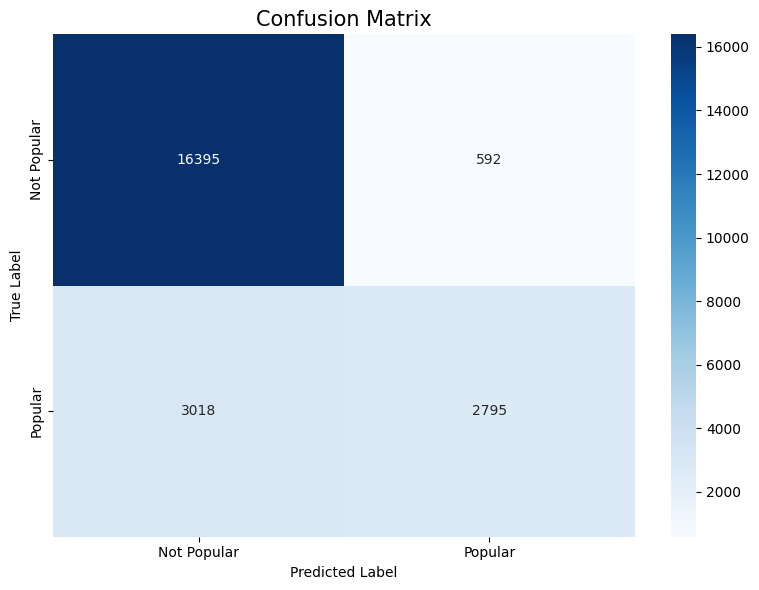

In [ ]:
# 2. Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Popular', 'Popular'],
            yticklabels=['Not Popular', 'Popular'])
plt.title('Confusion Matrix', fontsize=15)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=300)
plt.show()


The Confusion Matrix shows that the model is very good at predicting true negatives, with a high accuracy of 83%. While it has a high precision of 82%, the model has a moderate recall of 48%. This means that the model is good at predicting non-popular songs, but misses about half of all actual popular ones.

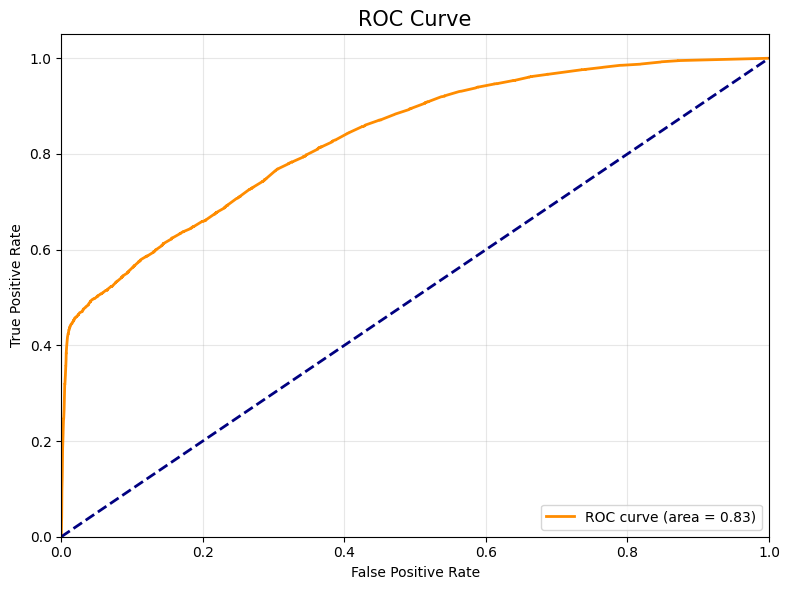

In [ ]:
# 3. ROC Curve
plt.figure(figsize=(8, 6))
y_probs = rf_clf.predict_proba(X_test_prepared)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', fontsize=15)
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("roc_curve.png", dpi=300)
plt.show()



The ROC curve has an area of 0.83, indicating that there is an 83% chance the model ranks a random popular song above a random non-popular one. This rate indicates a solid predictive power well above chance.

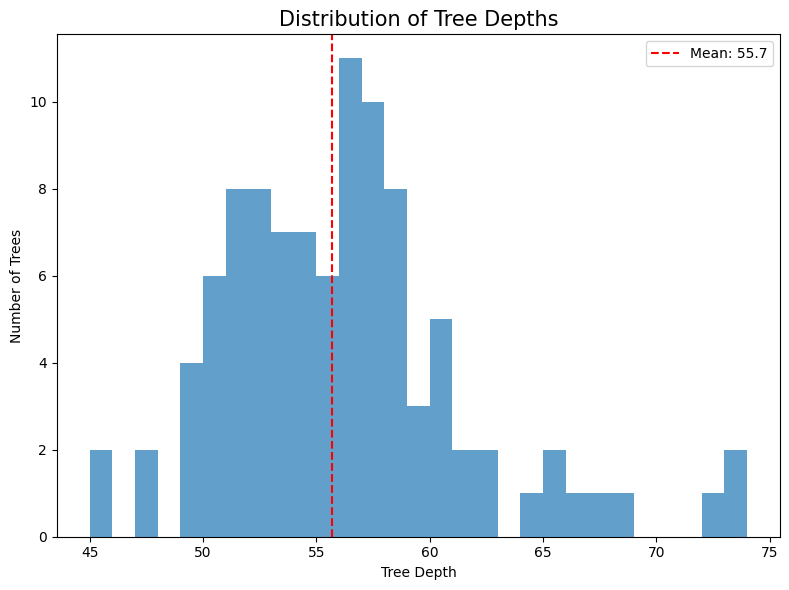

Model Accuracy: 0.8417
Average tree depth: 55.69
Number of trees: 100


In [ ]:
# 4. Tree Statistics
plt.figure(figsize=(8, 6))
depths = [tree.get_depth() for tree in rf_clf.estimators_]
plt.hist(depths, bins=range(min(depths), max(depths) + 2), alpha=0.7)
plt.axvline(x=np.mean(depths), color='red', linestyle='--',
            label=f'Mean: {np.mean(depths):.1f}')
plt.xlabel('Tree Depth')
plt.ylabel('Number of Trees')
plt.title('Distribution of Tree Depths', fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig("tree_depths.png", dpi=300)
plt.show()

# Print key stats
print(f"Model Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Average tree depth: {np.mean(depths):.2f}")
print(f"Number of trees: {len(rf_clf.estimators_)}")

The Distribution of Tree Depths is a histogram showing the depth of trees in the Random Forest model. Most trees have a depth between 50 and 60, indicating that the trees are relatively complex and large.

# 6: Insights and Conclusions

Through a series of explorations into this dataset, we were able to yield many key insights. We found some statistically significant relationships between popularity of a song and its mode, explicit content, danceability, and duration.


T-testing of the mode revealed that a song's major or minor key had significant impacts on the levels of popularity, with a high T-stat of 4.71. Similar trends were found between genre and explicit content, and both duration and danceability using a Pearson coefficient test. Though the specific attributes were statistically significant, coefficients were low in magnitude. Despite the limitations of some of our numerical findings, we were able to confirm several key features that show statistically significant relationships with popularity. This exploratory data analysis allowed us to create a basis for the machine learning models used later in the project.

We chose to use machine learning models that dealt with binary classification, which was testing whether a song was popular or not. Through this we utilized two different models, Random Forest and Logistic Regression. With its ability to capture non-linear relationships, the Random Forest Classifier was far more effective than Logistic Regression, which was insufficient in capturing the complexities of the relationship between features and popularity. The Random Forest model was extremely good at sorting non-popular songs, and moderately accurate at sorting the popular songs.

While we were able to sort out many of the relevant and irrelevant features in this project, our further steps would include exploring music based on genre and the features relevant to each specific genre. We would segment the dataset by genre and build specific models that explore the relationship between them and different musical attributes. Ultimately, this project gave several insights into the many different features that are taken into account when analyzing a song and their effects on the popularity.